In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df =pd.read_csv('wine.data',header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [11]:
X.shape,y.shape

((178, 13), (178,))

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=42)
X_train.shape,X_test.shape

((142, 13), (36, 13))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [17]:
X_train

array([[-0.24869238, -0.06402752, -2.30913708, ...,  0.9499668 ,
        -0.06060884,  0.12812374],
       [-0.73003489, -0.01874357, -1.51876454, ...,  0.51286172,
         1.07218194,  0.71956869],
       [-0.24925307, -0.82080356,  0.50522886, ..., -1.31940093,
        -0.31230353, -0.14988706],
       ...,
       [ 2.69494283, -1.01401428,  0.79902006, ...,  0.82706406,
         0.85918758, -0.19926391],
       [-0.79731064, -1.18464192,  0.06929709, ...,  0.49703787,
        -0.59064777,  1.67153542],
       [-0.98532979,  0.2291666 ,  0.23405328, ...,  0.41068206,
        -1.63298678,  0.15189943]])

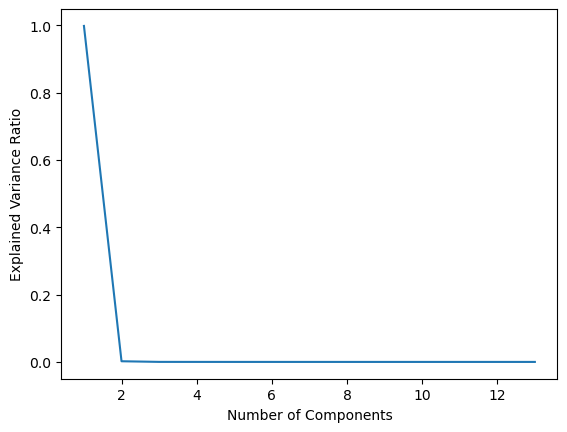

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1, 14), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [19]:
X_train_pca = pca.transform(X_train)[:, :2]

In [20]:
X_train_pca

array([[-736.36215861,  -84.11520984],
       [-735.87897185,  -89.20357227],
       [-736.67352278,  -85.11698285],
       [-736.65443732,  -84.79048656],
       [-736.61469308,  -87.60147046],
       [-735.3250436 ,  -86.15968145],
       [-737.06291674,  -86.57571952],
       [-734.7717403 ,  -87.95619656],
       [-736.77863475,  -89.09738995],
       [-737.11629782,  -86.77033691],
       [-736.62572681,  -87.48708131],
       [-736.40892101,  -87.73990676],
       [-734.99168382,  -87.03177568],
       [-738.10186233,  -86.8934762 ],
       [-737.19159985,  -86.05763027],
       [-736.26489428,  -86.14235557],
       [-736.3926858 ,  -87.27956145],
       [-735.02369888,  -86.96641548],
       [-735.39518293,  -88.5216329 ],
       [-736.26639668,  -87.04291407],
       [-735.4288215 ,  -87.52344255],
       [-737.07936275,  -87.072323  ],
       [-737.81984679,  -86.81910844],
       [-736.45603981,  -87.13747259],
       [-737.40916315,  -89.43655673],
       [-737.00660359,  -

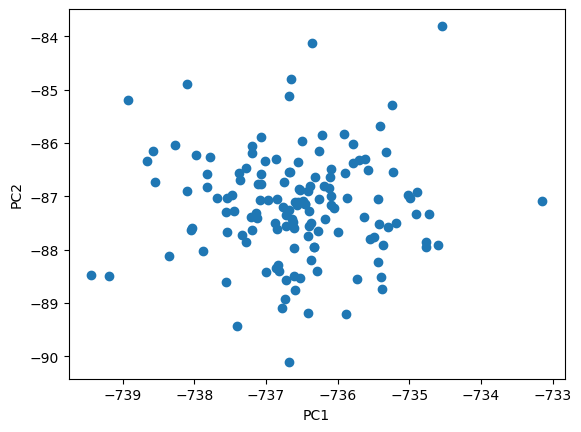

In [22]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train_pca)
labels = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_pca, labels)
print('Silhouette score:', score)

Silhouette score: 0.3061611448360381
